# Figure 4 LFE Comparison
In this notebook we demonstrate how to perform the two approaches to fill frequency and time gaps in the RAD1 measurements (Seen clearly in the Figure1 notebook). We then plot them as two spectragrams side by side.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.transforms as transforms
import numpy as np
import vaex as vx
from Wind_Waves.plotting_tools import spectragram
from Wind_Waves.integration_tools import create_sweeps, create_spins
from Wind_Waves.reading_tools import raw2csv

def _format_timedelta(delta):
    """Return a short human-readable label for a numpy timedelta64."""
    total_seconds = delta / np.timedelta64(1, 's')
    if total_seconds % 3600 == 0:
        hours = int(total_seconds // 3600)
        return f"{hours} hr" if hours == 1 else f"{hours} hrs"
    if total_seconds % 60 == 0:
        minutes = int(total_seconds // 60)
        return f"{minutes} min"
    return f"{int(total_seconds)} s"


def add_time_whisker(ax, start_time, width, label=None, y_offset=-0.18, cap_frac=0.025, color='white', lw=4):
    """
    Draw a horizontal whisker scale bar with end caps to show a time width.

    Parameters
    ----------
    ax : matplotlib Axes
        Target axes.
    center_time : datetime64
        Where the whisker is centered on the x-axis.
    width : numpy.timedelta64
        Total width of the whisker.
    label : str, optional
        Text placed below the whisker. If None, a label is inferred from `width`.
    y_offset : float
        Y location in axis coordinates (0 is bottom of plot).
    cap_frac : float
        Half-height of each end cap in axis coordinates.
    color : str
        Line/text color.
    lw : int or float
        Line width.
    """
    half_width = width / 2
    # start_time = center_time - half_width
    end_time = start_time + width
    center_time = start_time + half_width

    label = label or _format_timedelta(width)

    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

    # Main whisker line
    ax.plot([start_time, end_time], [y_offset, y_offset],
            color=color, lw=lw, transform=trans, clip_on=False)
    # End caps
    ax.plot([start_time, start_time], [y_offset - cap_frac, y_offset + cap_frac],
            color=color, lw=lw, transform=trans, clip_on=False)
    ax.plot([end_time, end_time], [y_offset - cap_frac, y_offset + cap_frac],
            color=color, lw=lw, transform=trans, clip_on=False)

    ax.text(center_time, y_offset - cap_frac * 1.4, label,
            transform=trans, ha='center', va='top', color=color, fontsize=26)

## Select Time Range

In [2]:
date= np.datetime64('2001-02-28 18:00')
start= date - np.timedelta64(1, 'h')
end= start + np.timedelta64(3, 'h')
start-= np.timedelta64(183, 's')
end+= np.timedelta64(183, 's')  

## Load Data

In [3]:
days = start+ np.arange((end.astype('datetime64[D]')-start.astype('datetime64[D]')).astype('timedelta64[D]')+1)
raw= vx.open(list((np.unique([raw2csv(date, '../../Example_Data/raw_rad1/', '../../Example_Data/raw_rad1/') for date in (days)]))))
raw.drop('SWEEP', inplace=True)

#,P_FIELD,JULIAN_DAY_B1,JULIAN_DAY_B2,JULIAN_DAY_B3,MSEC_OF_DAY,RECEIVER_CODE,JULIAN_SEC_FRAC,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,JULIAN_SEC_FRAC_2,ISWEEP,IUNIT,NPBS,SUN_ANGLE,SPIN_RATE,KSPIN,MODE,LISTFR,NFREQ,ICAL,IANTEN,IPOLA,IDIPXY,SDURCY,SDURPA,NPALCY,NFRPAL,NPALIF,NSPALF,NZPALF,FREQ,VSPAL,VS2PAL,VZPAL,TSPAL,TS2PAL,TZPAL,Date_UTC,DATETIME_S,DATETIME_SP,DATETIME_Z,unit_check,kspin_check,mode_check,ant_check,pol_check,eq_dipole_check,nsample_check,sweep_tag,radius,VZPAL_1au
0,76,0,27,86,33961,1,604627233,2001,2,28,0,0,33,0.9610000252723694,1,3,5565,204.345703125,116.08152770996094,0,3,8,32,0,2,1,1,183.23672485351562,2.8630738258361816,64,1,64,16,8,1040,0.01462497003376484,0.01462497003376484,0.0002266711089760065,0.12695220112800598,0.12695220112800598,0.203923299908638,2001-02-28 00:00:33.961000,2001-02-28 00:00:34.087952200,2001-02-28 00:00:34.087952200,2001-02-28 00:00:34.164923300,True,True,True,True,True,True,True,True,105.13,4.5538772745735544e-09
1,76,0,27,86,33961,1,604627233,2001,2,28,0,0,33,0.9610000252723694,1,3,5565,204.345703125,116.08152770996094,0,3,8,32,0,2,1,1,183.23672485351562,2.8630738258361816,64,1,64,16,8,1040,0.013758874498307705,0.013758874498307705,0.000255318358540535,0.28089430928230286,0.28089430928230286,0.5617886781692505,2001-02-28 00:00:33.961000,2001-02-28 00:00:34.241894309,2001-02-28 00:00:34.241894309,2001-02-28 00:00:34.522788678,True,True,True,True,True,True,True,True,105.13,5.129407430843943e-09
2,76,0,27,86,33961,1,604627233,2001,2,28,0,0,33,0.9610000252723694,1,3,5565,204.345703125,116.08152770996094,0,3,8,32,0,2,1,1,183.23672485351562,2.8630738258361816,64,1,64,16,8,1040,0.013758874498307705,0.013758874498307705,0.00023575621889904141,0.48481759428977966,0.48481759428977966,0.919654130935669,2001-02-28 00:00:33.961000,2001-02-28 00:00:34.445817594,2001-02-28 00:00:34.445817594,2001-02-28 00:00:34.880654131,True,True,True,True,True,True,True,True,105.13,4.73639932514459e-09
3,76,0,27,86,33961,1,604627233,2001,2,28,0,0,33,0.9610000252723694,1,3,5565,204.345703125,116.08152770996094,0,3,8,32,0,2,1,1,183.23672485351562,2.8630738258361816,64,1,64,16,8,1040,0.011473963037133217,0.011473963037133217,0.00024529677466489375,0.6387597322463989,0.6387597322463989,1.2775194644927979,2001-02-28 00:00:33.961000,2001-02-28 00:00:34.599759732,2001-02-28 00:00:34.599759732,2001-02-28 00:00:35.238519464,True,True,True,True,True,True,True,True,105.13,4.928071392595919e-09
4,76,0,27,86,33961,1,604627233,2001,2,28,0,0,33,0.9610000252723694,1,3,5565,204.345703125,116.08152770996094,0,3,8,32,0,2,1,1,183.23672485351562,2.8630738258361816,64,1,64,16,8,1040,0.012186833657324314,0.012186833657324314,0.00023575621889904141,0.8426830172538757,0.8426830172538757,1.6353849172592163,2001-02-28 00:00:33.961000,2001-02-28 00:00:34.803683017,2001-02-28 00:00:34.803683017,2001-02-28 00:00:35.596384917,True,True,True,True,True,True,True,True,105.13,4.73639932514459e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"240,635",76,0,27,86,86168034,1,604713368,2001,2,28,23,56,8,0.03499998524785042,470,3,5565,300.41015625,116.08152770996094,0,3,8,32,0,2,1,1,183.23672485351562,2.8630738258361816,64,1,64,16,8,20,0.12277186661958694,0.12277186661958694,0.010699122212827206,90.82083892822266,90.82083892822266,181.6416778564453,2001-02-28 23:56:08.034000,2001-02-28 23:57:38.854838928,2001-02-28 23:57:38.854838928,2001-02-28 23:59:09.675677856,True,True,True,True,True,True,True,True,105.13,2.149479469306178e-07
"240,636",76,0,27,86,86168034,1,604713368,2001,2,28,23,56,8,0.03499998524785042,470,3,5565,300.41015625,116.08152770996094,0,3,8,32,0,2,1,1,183.23672485351562,2.8630738258361816,64,1,64,16,8,20,0.09348297864198685,0.09348297864198685,0.010699122212827206,91.02476501464844,91.02476501464844,181.9995574951172,2001-02-28 23:56:08.034000,2001-02-28 23:57:3

## Assign Spin and Sweep Values

In [4]:
raw= raw.to_pandas_df()
create_sweeps(raw, time='Date_UTC')
create_spins(raw, spin='SPIN')
raw= vx.from_pandas(raw)

## Create Figure

Text(0.5, 1.08, 'Sweep Averaged Ignore Gaps')

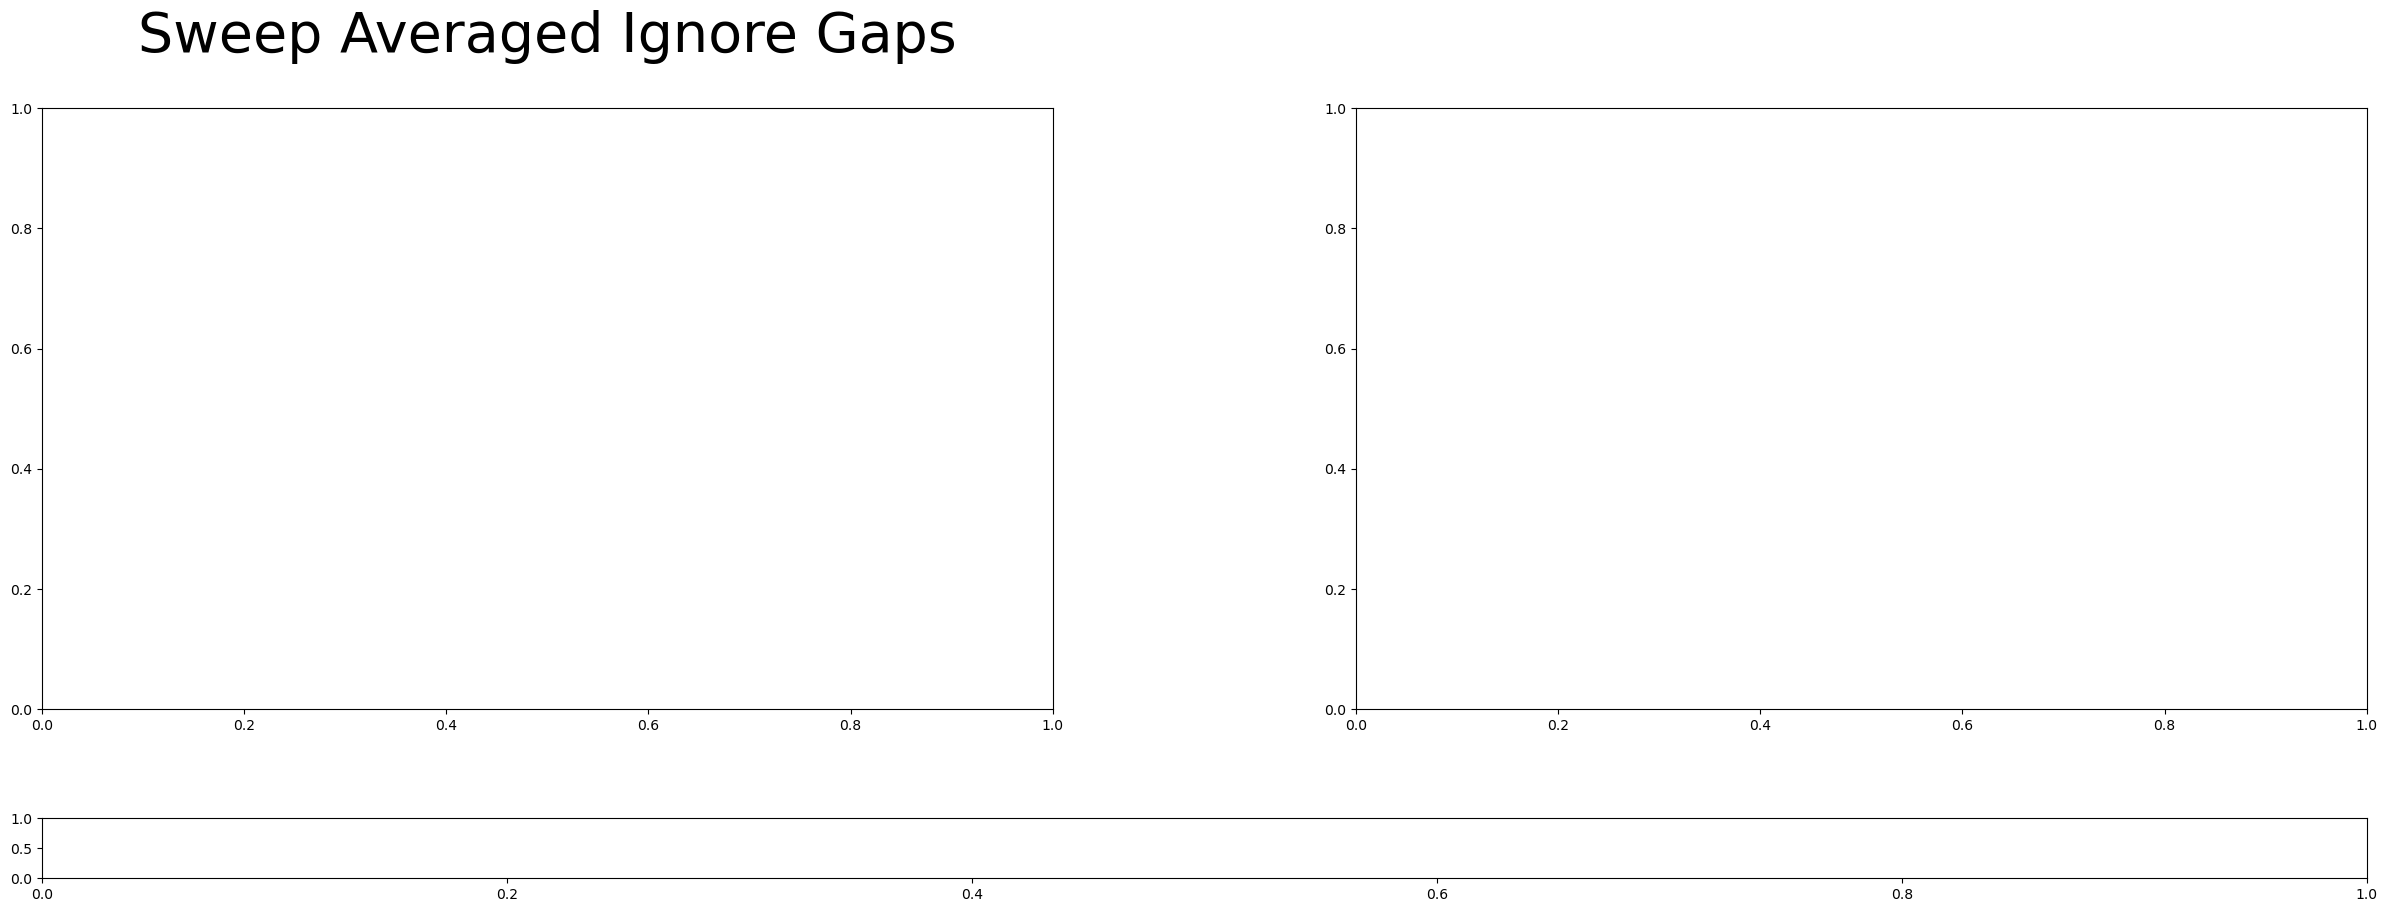

In [5]:
fig=plt.figure(figsize=(30, 10))
gs= fig.add_gridspec(2, 2, wspace=0.3, hspace=0.33, height_ratios=[1, 0.1])
ax= fig.add_subplot(gs[0, 0])
ax2= fig.add_subplot(gs[0, 1])
cax= fig.add_subplot(gs[1, :])

ax.set_title(f"Sweep Averaged Ignore Gaps", 
                y=1.08, size=40)

## Plot Spectragram with No Gap Filling: Approach 1

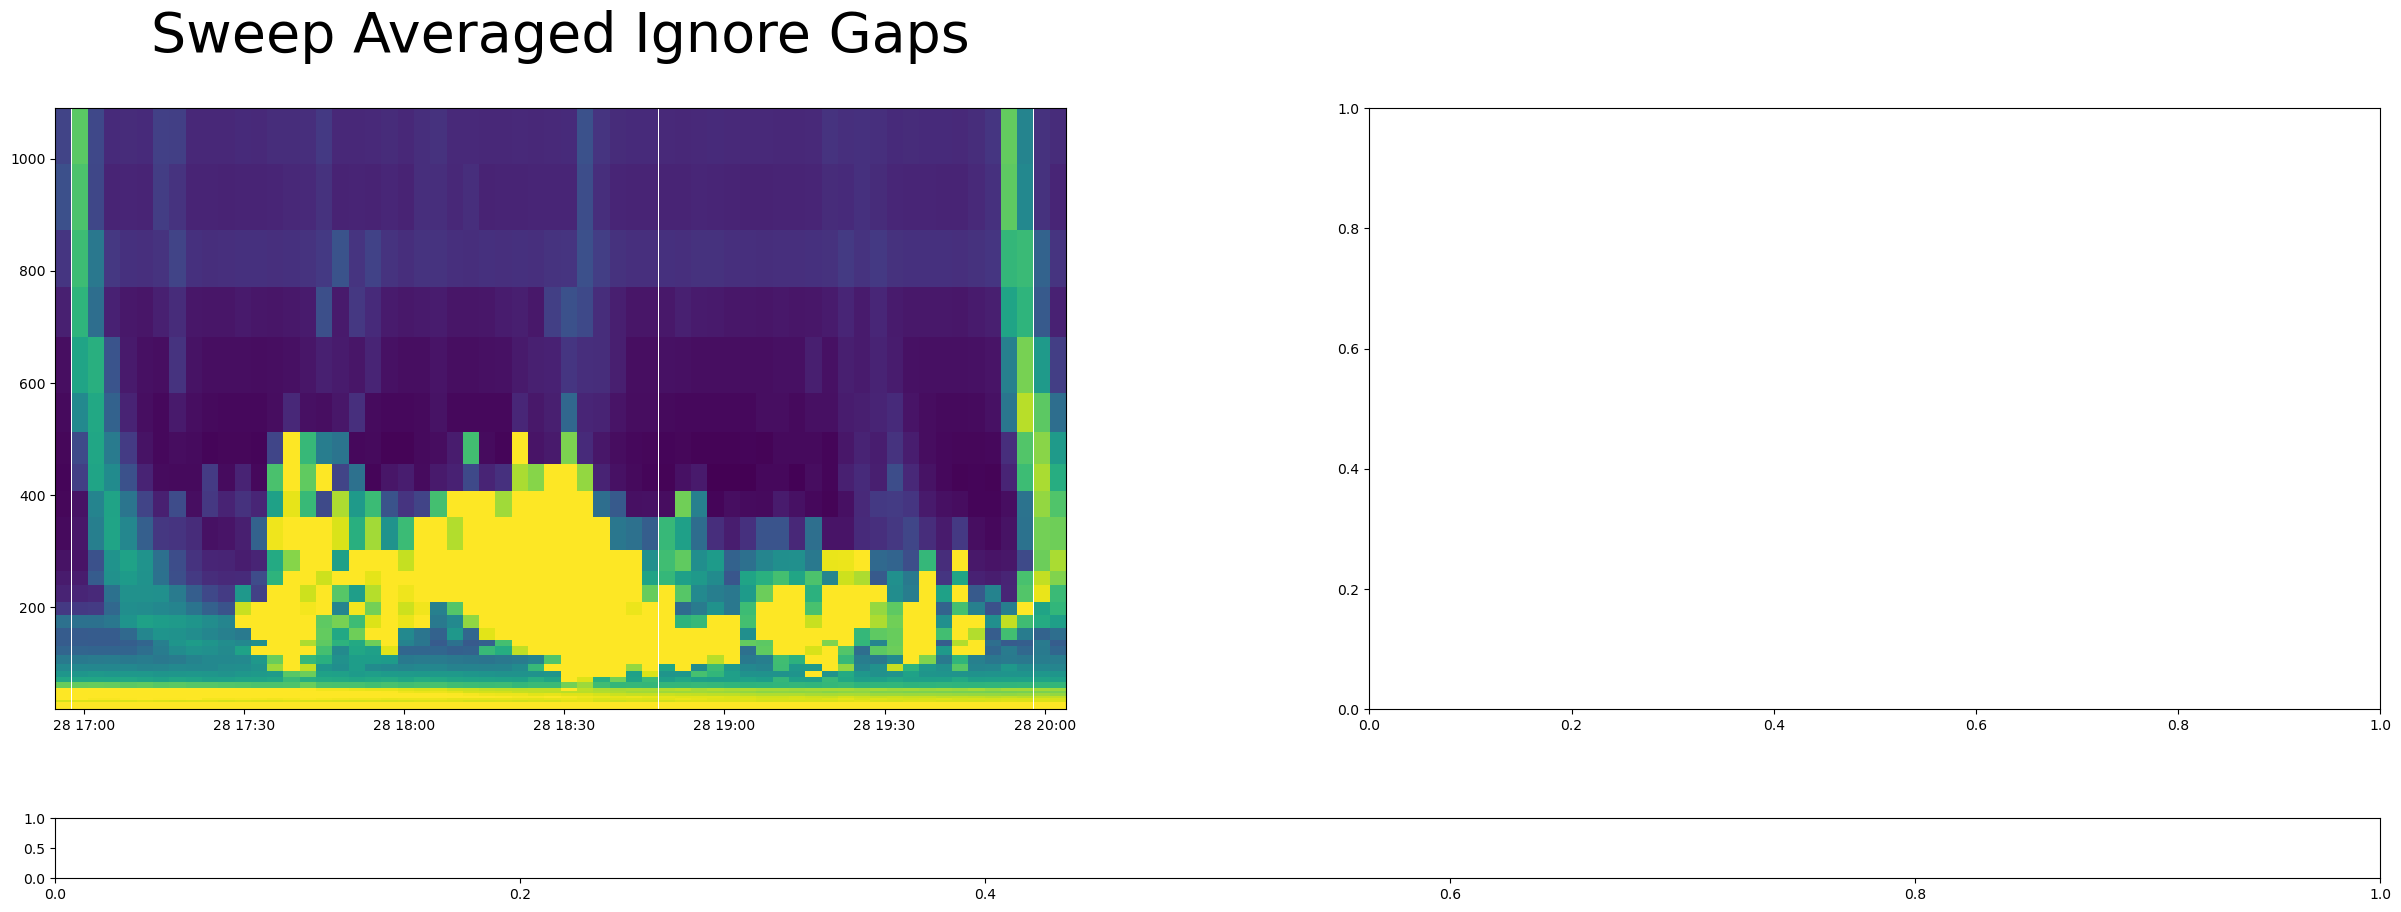

In [6]:
pc, vals= spectragram(raw, ax=ax, groupby='SWEEP', frequency='FREQ', datetime='DATETIME_Z', flux='VZPAL_1au',
                    start=start, end=end, gap_filling='ignore')
fig

## Add Features to and Format Subplot

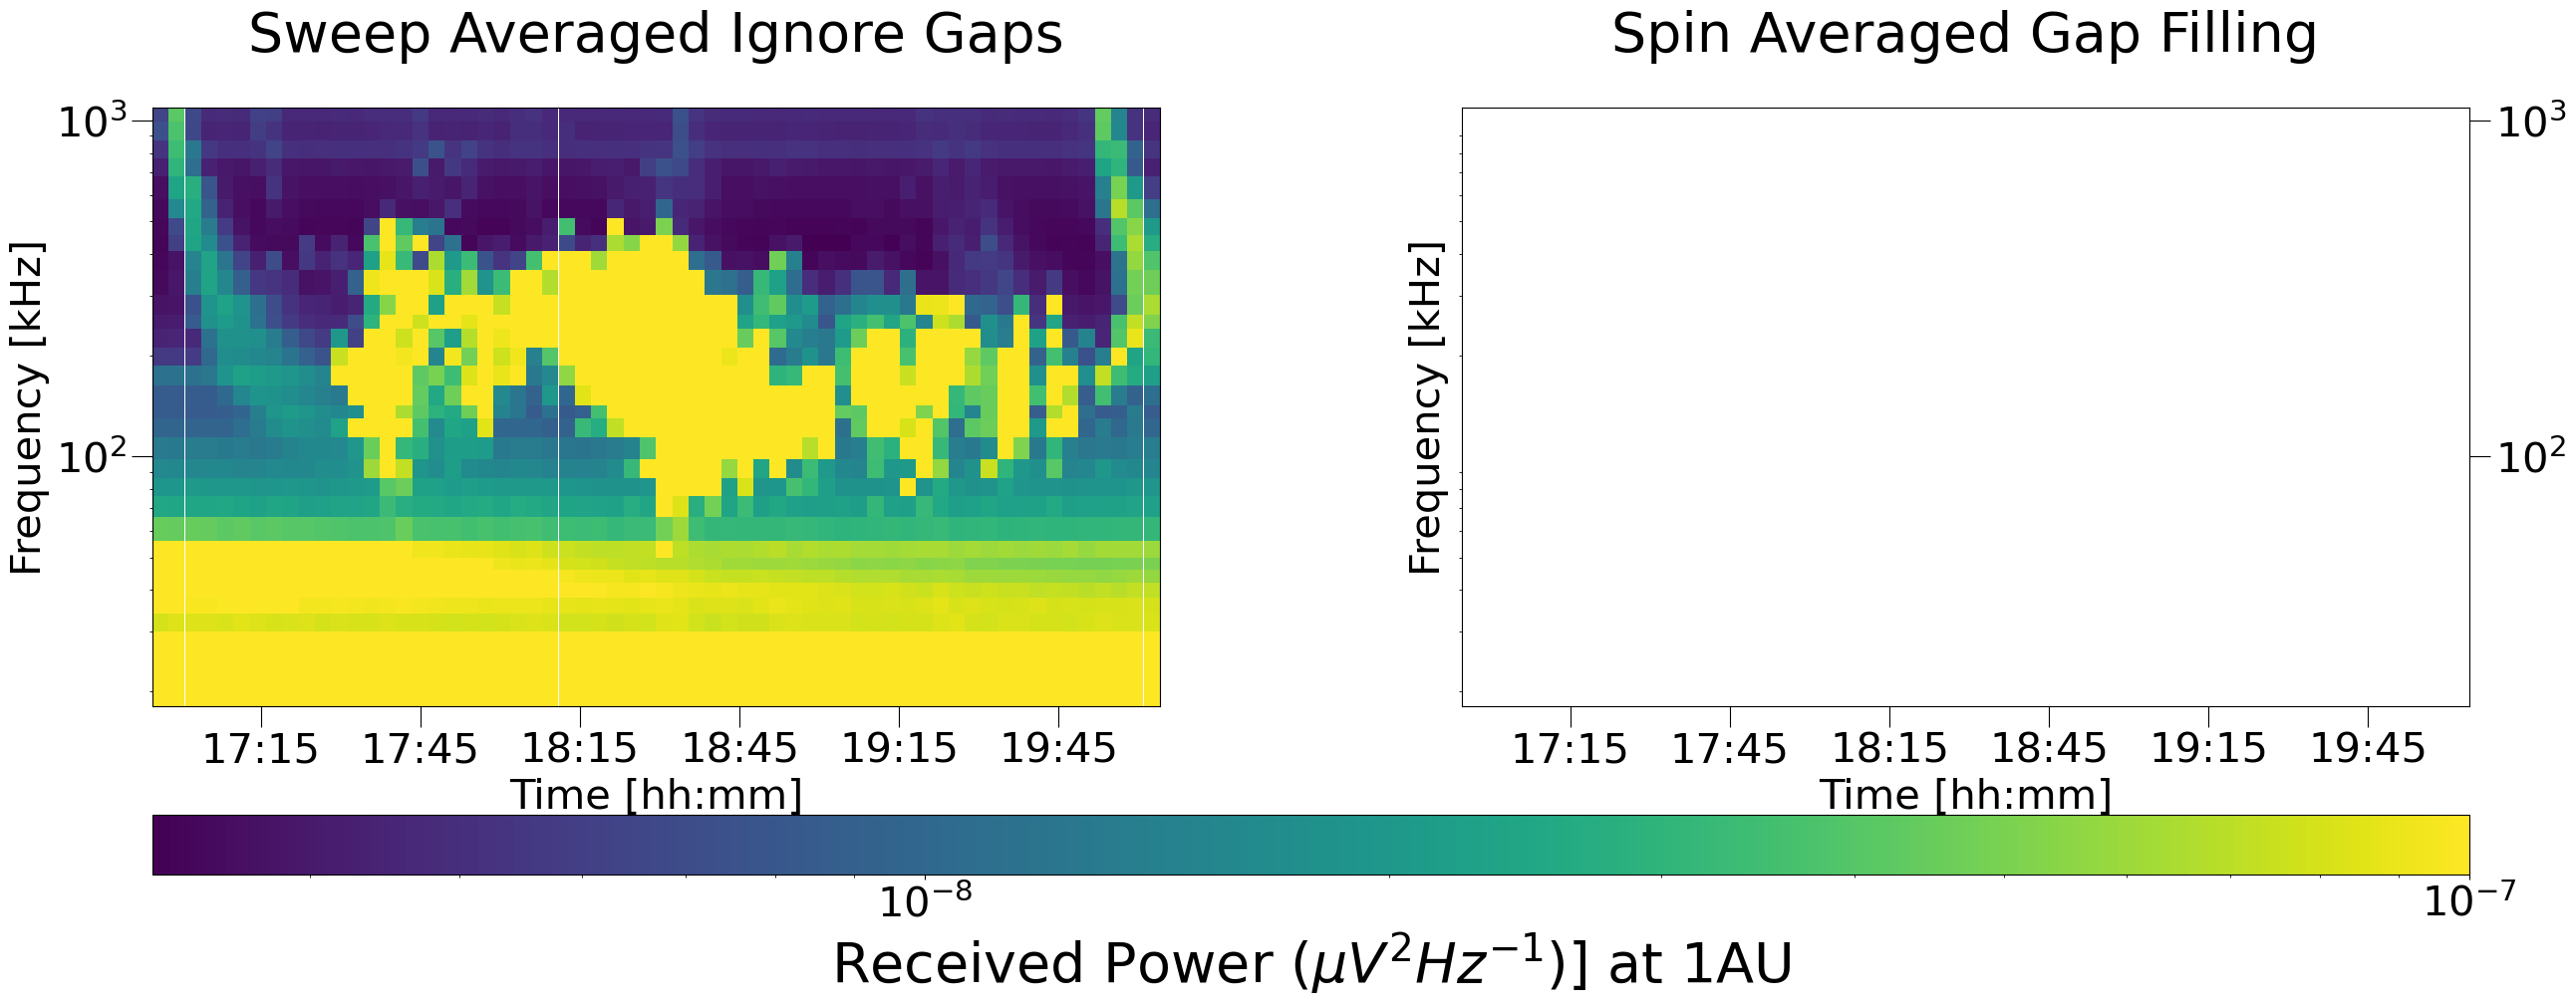

In [7]:
cbar= fig.colorbar(pc, cax=cax, orientation='horizontal')
cbar.set_label('Received Power ($\mu V^{2}Hz^{-1}$)] at 1AU', size=40)
ax.set_ylabel('Frequency [kHz]', size=30)
ax.set_xlabel('Time [hh:mm]', size=30)
ax.tick_params(axis='both', which='major', labelsize=30, labelleft=True, labelright=False,
                left=True, right=False, size=15)
cax.tick_params(axis='both', which='major', labelsize=30)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.set_yscale('log')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax2.set_yscale('log')
ax2.sharey(ax)
ax2.sharex(ax)
ax2.set_title(f"Spin Averaged Gap Filling", 
                y=1.08, size=40)
ax2.set_ylabel('Frequency [kHz]', size=30)
ax2.set_xlabel('Time [hh:mm]', size=30)
ax2.tick_params(axis='both', which='major', labelsize=30, labelleft=False, labelright=True,
                left=False, right=True, size=15)
fig

## Plot Spectragram with Gap Filling: Approach 2

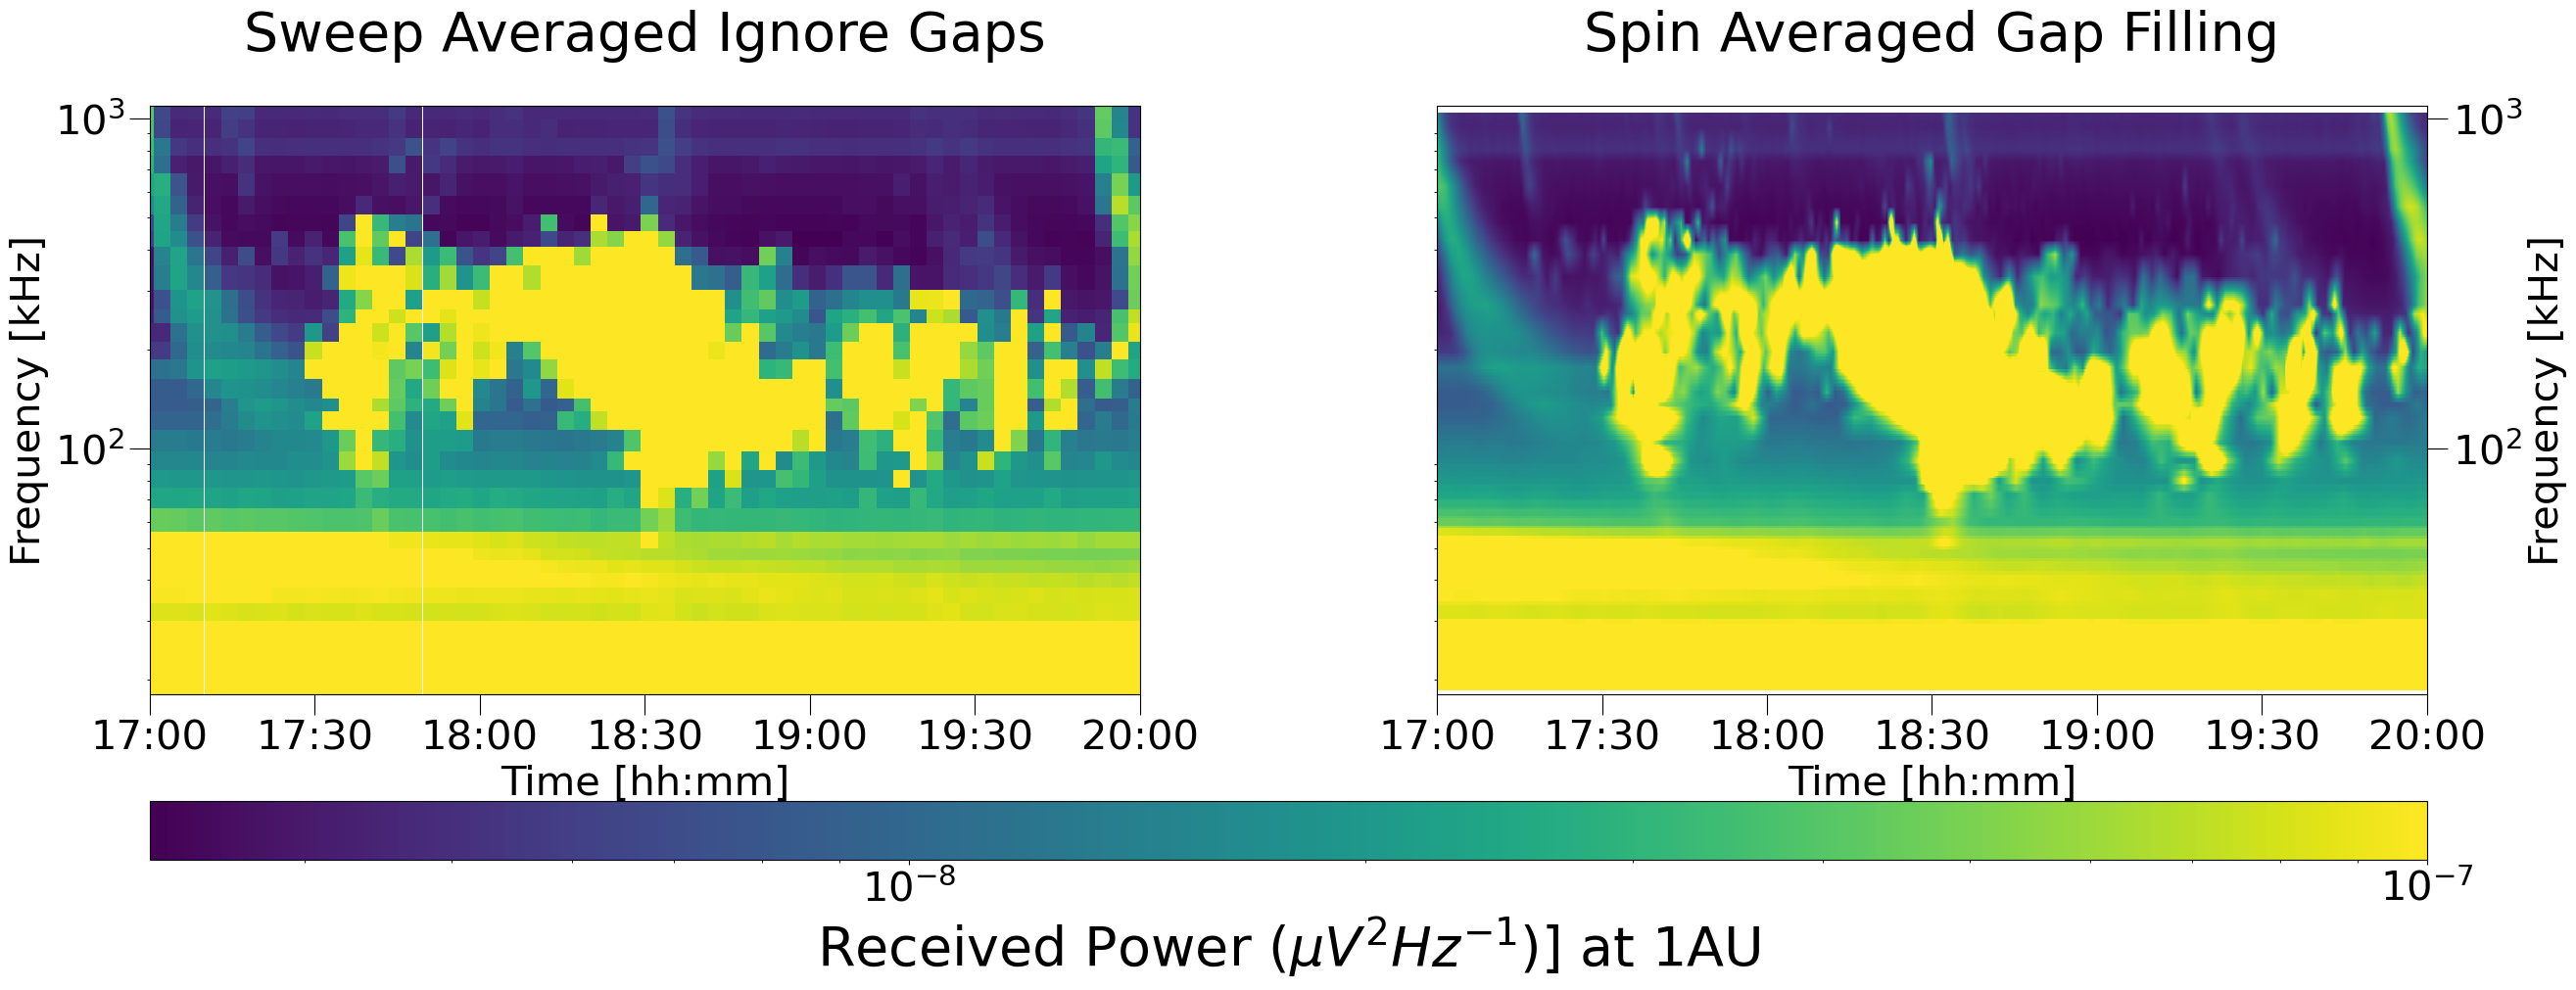

In [8]:
pc2, vals= spectragram(raw, ax=ax2, groupby='SPIN', frequency='FREQ', datetime='DATETIME_Z', flux='VZPAL_1au',
                    start=start, end=end, gap_filling='fill')
pc2.set_clim(pc.get_clim())
ax2.set_xlim(start+np.timedelta64(183, 's'), end-np.timedelta64(183, 's'))
ax2.yaxis.set_label_position("right")
fig

## Add Subplot Labels

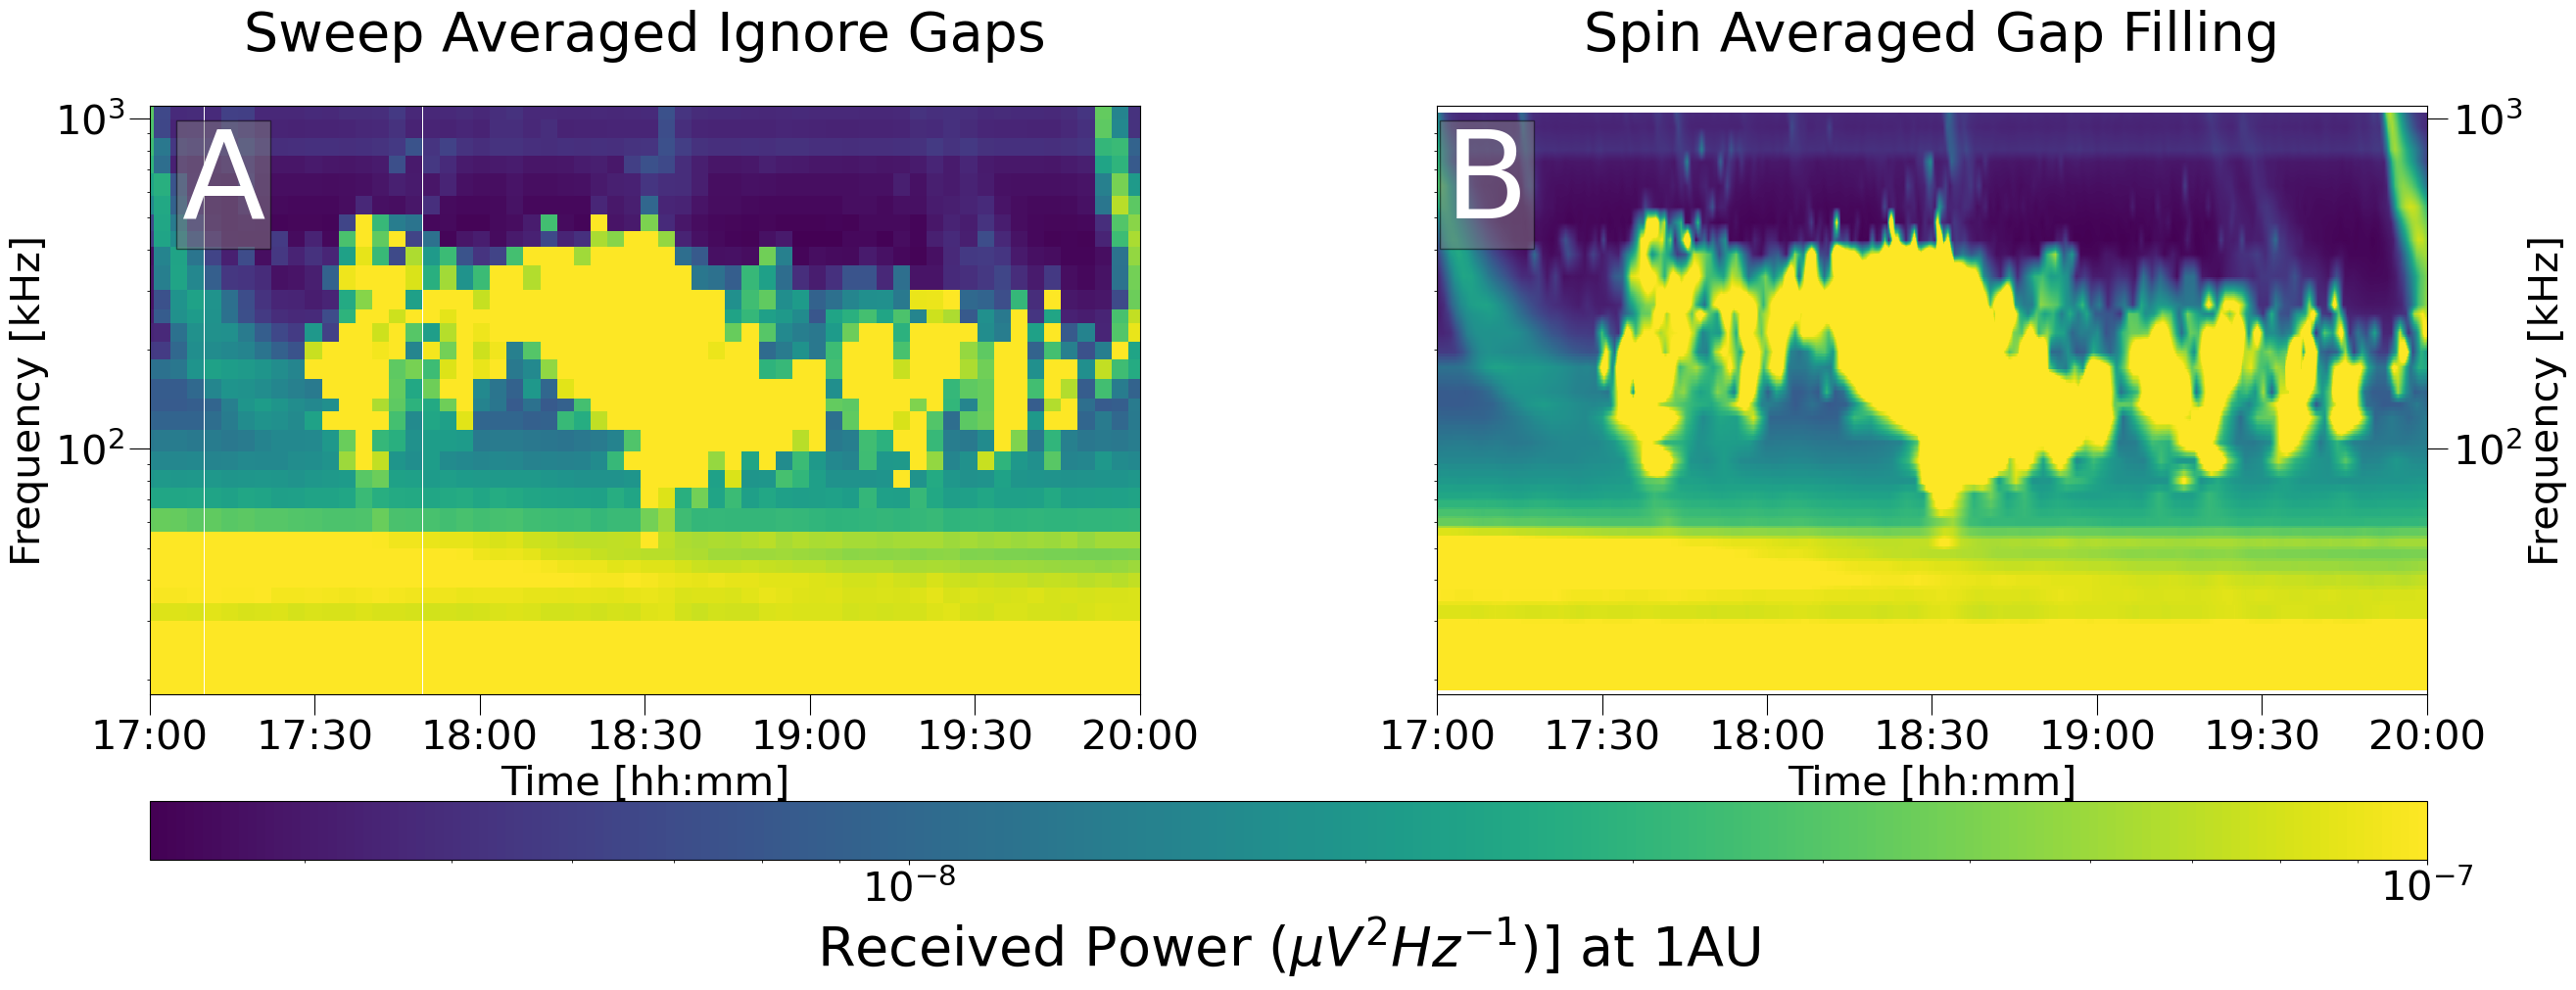

In [9]:
fig.text(.15, .8, 'A', color='white', bbox=dict(facecolor='grey', alpha=.5),
         size=90, ha='center', va='center')

fig.text(.58, .8, 'B', color='white', bbox=dict(facecolor='grey', alpha=.5),
         size=90, ha='center', va='center')
fig

## Add Frequency Range Lines

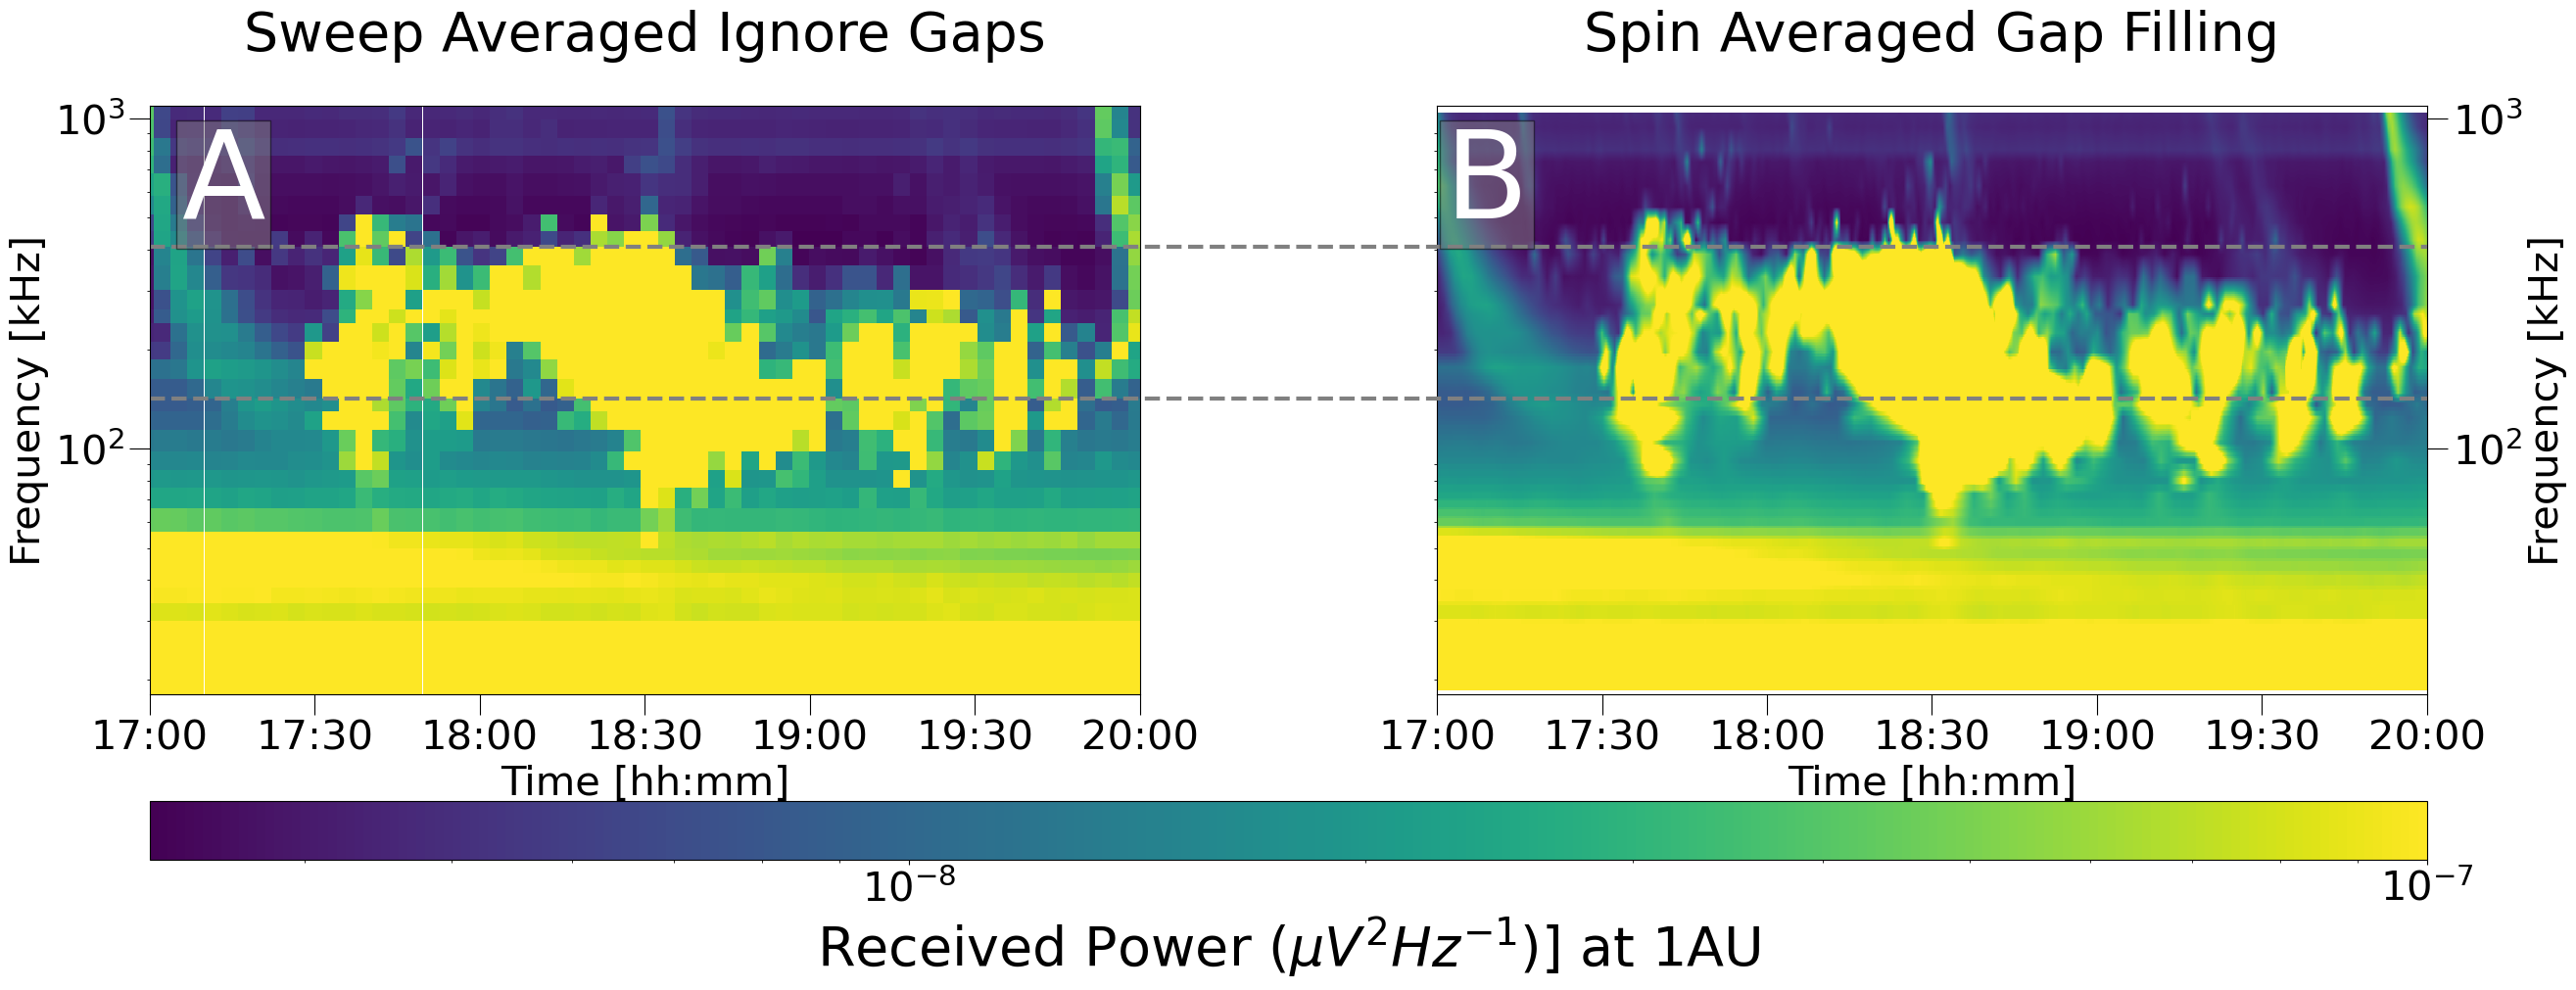

In [10]:
left  = ax.get_position().x0
right = ax2.get_position().x1   # same x as your text label

trans = transforms.blended_transform_factory(
    fig.transFigure,
    ax.transData)
for thresh in [142, 408]:
    ax.plot(
        [left, right],
        [thresh, thresh],
        transform=trans,
        linestyle="--",
        linewidth=3,
        color="gray",
        clip_on=False
    )
ax2.set_zorder(ax.get_zorder()-1)
fig

## Add Spin Per Sweep Text

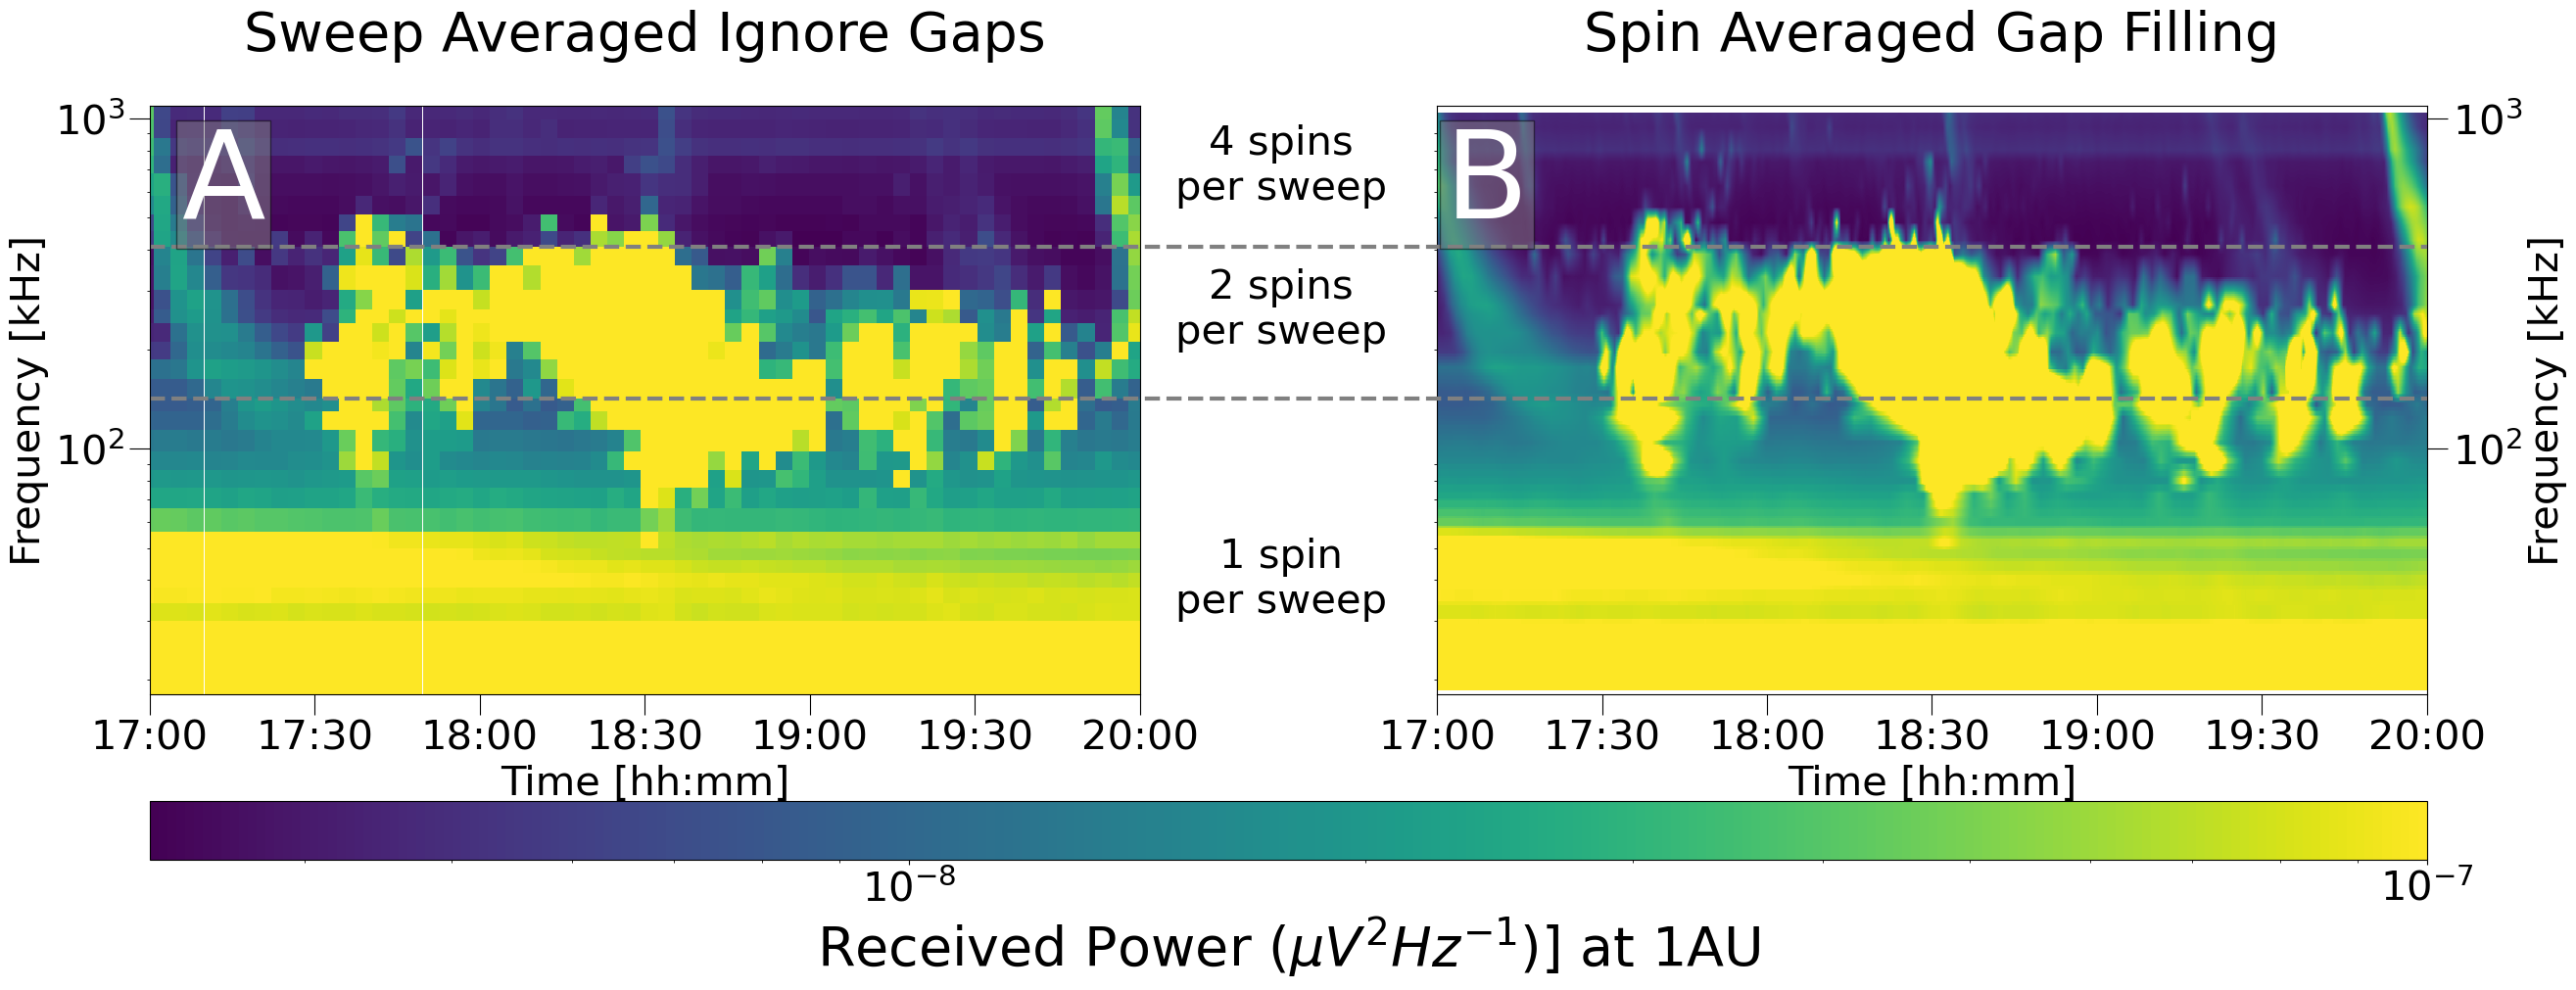

In [11]:
for thresh, n in zip([40, 136+(388-136)/2, 388+(1040-388)/2], [1, 2, 4]):
    fig.text(
    .51,
    thresh,
    f"{n} spins\nper sweep" if n>1 else f"{n} spin\nper sweep" ,
    transform=trans,
    size=30,
    va='center',
    ha='center'
)
fig

## Spin and Sweep Reference Length Whiskers

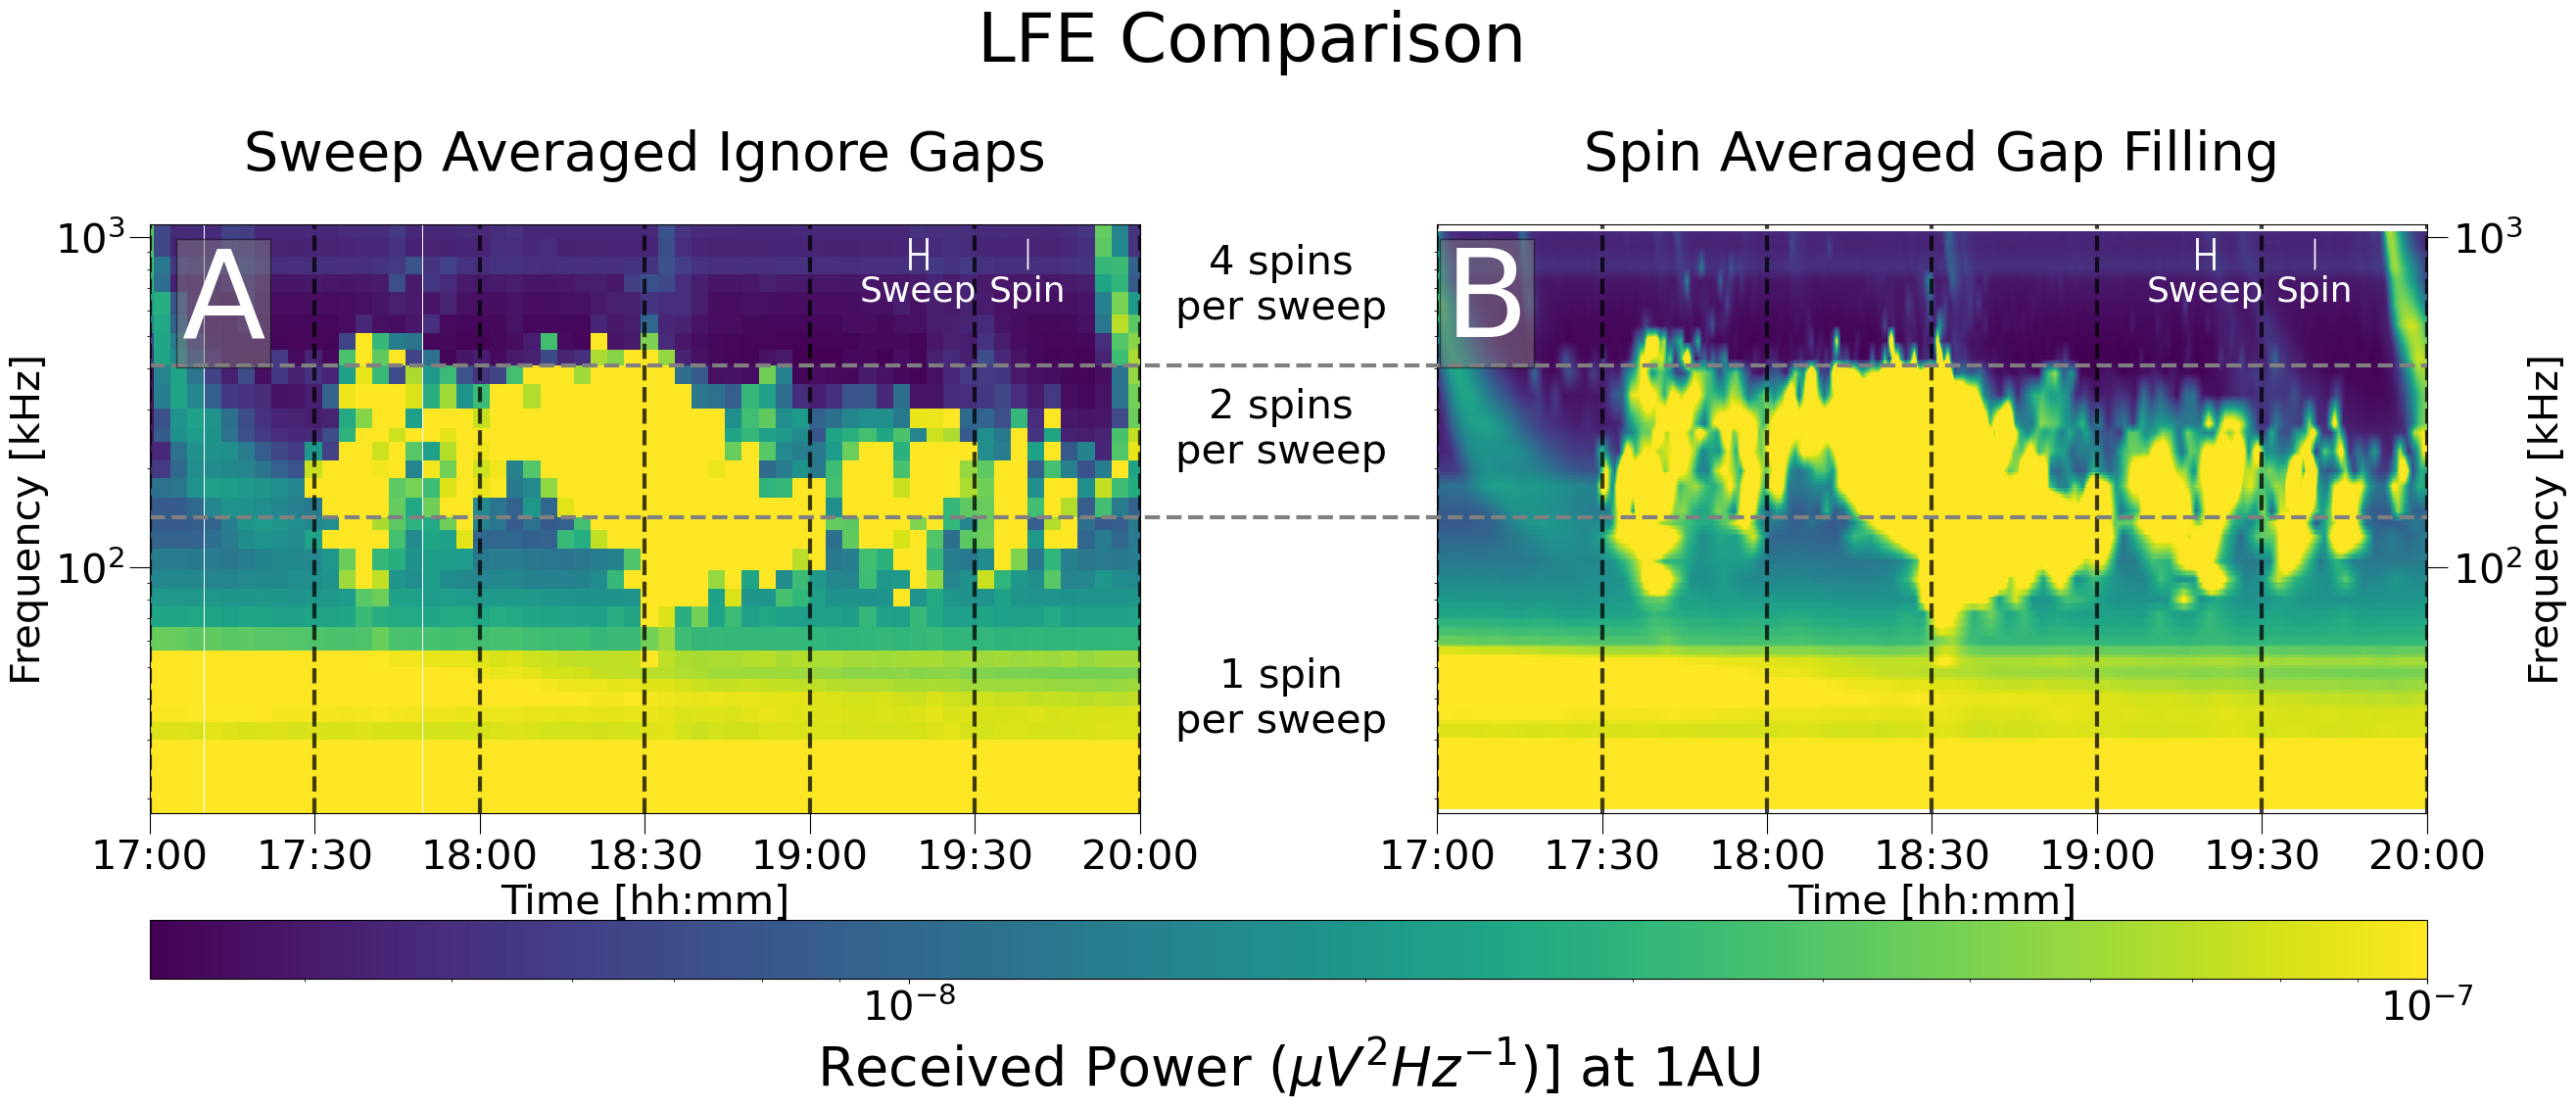

In [12]:
fig.suptitle('LFE Comparison', size=50, y=1.1)
fig.canvas.draw()  # ensure labels exist

whisker_width = np.timedelta64(183, 's')  # edit this to change the shown time span

add_time_whisker(ax, raw.DATETIME_Z.min(selection=raw.SWEEP==380), whisker_width, y_offset=.95, label='Sweep',
                 lw=2)
add_time_whisker(ax2, raw.DATETIME_Z.min(selection=raw.SWEEP==380), whisker_width, y_offset=.95, label='Sweep',
                 lw=2)

whisker_width = np.timedelta64(2505, 'ms')  # edit this to change the shown time span

add_time_whisker(ax, raw.DATETIME_Z.min(selection=raw.SWEEP==387), whisker_width, y_offset=.95, label='Spin',
                 lw=1)
add_time_whisker(ax2, raw.DATETIME_Z.min(selection=raw.SWEEP==387), whisker_width, y_offset=.95, label='Spin',
                 lw=1)
ax.grid(True, which='major', axis='x', color='black', linestyle='--', alpha=0.75, zorder=1000, lw=3)
ax2.grid(True, which='major', axis='x', color='black', linestyle='--', alpha=0.75, zorder=1000, lw=3)
fig